In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})

In [2]:
zero_vals = sample_df["column 1"].loc[sample_df["column 2"] == 0]
print(zero_vals)

0    20
4    65
5    50
Name: column 1, dtype: int64


In [3]:
one_vals = sample_df["column 1"].loc[sample_df["column 2"] == 1]
print(one_vals)

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64


In [4]:
fifty_vals = sample_df["column 2"].loc[sample_df["column 1"] == 50]
print(fifty_vals)

1    1
3    1
5    0
Name: column 2, dtype: int64


In [5]:
# separate group 8
df = pd.read_csv("oh_table.csv")
df.head()
G = df["G"].loc[df["group_id"] == 8]
J = df["J"].loc[df["group_id"] == 8]
distance = df["distance"].loc[df["group_id"] == 8]

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [7]:
# convert G to absolute magnitude
absmag = G - 5 * np.log10(distance) + 5

In [85]:
# subtract G - J
color = G - J 
sunj = 3.64
sung = 5.12
sun = sung - sunj

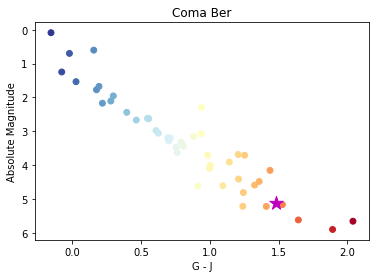

In [87]:
# create scatter plot
cm = plt.cm.get_cmap("RdYlBu_r")
plt.scatter(color, absmag, c=color, s=35, cmap=cm)
plt.scatter(sun, sung, c='m', s=200, marker='*')
plt.gca().invert_yaxis()
plt.title("Coma Ber")
plt.xlabel("G - J")
plt.ylabel("Absolute Magnitude")
plt.savefig("ComaBer.png", dpi=1000)
plt.show()

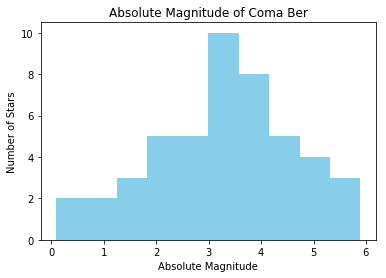

In [80]:
plt.hist(absmag, color="skyblue")
plt.title("Absolute Magnitude of Coma Ber")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number of Stars")
plt.show()

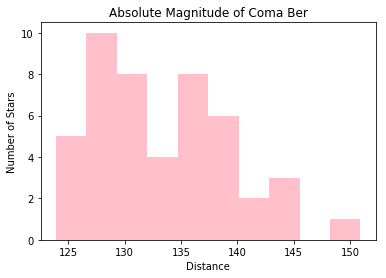

In [83]:
plt.hist(distance, color="pink")
plt.title("Absolute Magnitude of Coma Ber")
plt.xlabel("Distance")
plt.ylabel("Number of Stars")
plt.show()